<center><img src="redpopcorn.jpg"></center>

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry.

You work for a production company that specializes in nostalgic styles. You want to do some research on movies released in the 1990's. You'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

You have been supplied with the dataset `netflix_data.csv`, along with the following table detailing the column names and descriptions. Feel free to experiment further after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [1]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the Netflix CSV as a DataFrame
netflix_df = pd.read_csv("netflix_data.csv")

## Pre-processing

First we will change the **long Dataframe name** for the sake of simplicity. Then we will see the characteristics of data and identify data to be cleanned.

In [2]:
df=netflix_df

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4812 entries, 0 to 4811
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       4812 non-null   object
 1   type          4812 non-null   object
 2   title         4812 non-null   object
 3   director      4812 non-null   object
 4   cast          4812 non-null   object
 5   country       4812 non-null   object
 6   date_added    4812 non-null   object
 7   release_year  4812 non-null   int64 
 8   duration      4812 non-null   int64 
 9   description   4812 non-null   object
 10  genre         4812 non-null   object
dtypes: int64(2), object(9)
memory usage: 413.7+ KB


Now lets check the format of the strings.

In [4]:
df.sample(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
1733,s2776,Movie,Holidays,"Anthony Scott Burns, Nicholas McCarthy, Adam E...","Madeleine Coghlan, Savannah Kennick, Ruth Brad...",United States,"July 15, 2016",2016,106,Eight gleefully grim short tales set on Hallow...,Comedies
1381,s2195,Movie,Fitoor,Abhishek Kapoor,"Aditya Roy Kapoor, Katrina Kaif, Tabu, Rahul B...",India,"August 2, 2018",2016,124,A young artist falls for an aristocratic young...,Dramas
4147,s6659,Movie,The Men Who Stare at Goats,Grant Heslov,"George Clooney, Ewan McGregor, Jeff Bridges, K...",United States,"June 4, 2019",2009,94,A journalist latches onto an unbelievable stor...,Comedies
2953,s4721,Movie,P.S. I Love You,Richard LaGravenese,"Hilary Swank, Gerard Butler, Lisa Kudrow, Gina...",United States,"April 1, 2019",2007,126,When she loses her beloved husband to a brain ...,Dramas
3760,s6043,Movie,Thank You,Anees Bazmee,"Akshay Kumar, Bobby Deol, Sonam Kapoor, Irrfan...",India,"August 2, 2018",2011,131,Three cheating husbands end up paying the pric...,Comedies


And the Statistical analysis:

In [5]:
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
count,4812,4812,4812,4812,4812,4812,4812,4812.000000,4812.000000,4812,4812
unique,4812,2,4812,3615,4690,72,1292,NaN,NaN,4807,31
top,s2,Movie,7:19,"Raúl Campos, Jan Suter",Samuel West,United States,"January 1, 2020",NaN,NaN,A scheming matriarch plots to cut off her disa...,Dramas
freq,1,4677,1,18,10,1886,100,NaN,NaN,2,1343
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012.711554,99.566708,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.517978,30.889305,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1942.000000,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011.000000,88.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016.000000,99.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,116.000000,NaN,NaN


Conclusions:
*  the ``release_year``, and ``duration`` columns are in an ``int`` type.
* There are no *null values* in the data.
* For the project, only the columns ``genre``, ``type``, ``duration`` and ``released_year`` are required
* also the columns ``show_id`` and ``title`` will be kept.
* Further statistical is to be made to ``release_year`` and ``duration`` of the movies/tv
* unique values are to be identified for ``genre`` and ``type``
* all other columns are to be removed

In [6]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

``type`` rows with *``'Movie'``* value will be kept

In [7]:
print(df['genre'].unique())

['Dramas' 'Horror Movies' 'Action' 'International TV' 'Documentaries'
 'Independent Movies' 'Comedies' 'Sci-Fi' 'International Movies'
 'Children' 'TV Shows' 'Uncategorized' 'Classic Movies' 'Thrillers'
 'Stand-Up' 'Anime Features' 'Music' 'Anime Series' 'Kids' 'Docuseries'
 'Crime TV' 'British TV' 'Cult Movies' 'TV Action' 'Romantic TV'
 'TV Horror' 'Romantic Movies' 'TV Comedies' 'Classic' 'Reality TV'
 'LGBTQ Movies']


Note ``'Classic'`` and ``'Classic Movies'`` could be the same genre.

In [8]:
genre_counts = df['genre'].value_counts()
print(genre_counts)

genre
Dramas                  1343
Comedies                1029
Action                   696
Children                 421
Documentaries            352
Stand-Up                 283
Horror Movies            239
International Movies     100
Classic Movies            69
Thrillers                 49
International TV          39
Crime TV                  30
Uncategorized             25
Independent Movies        20
British TV                20
Anime Features            18
Music                     14
Sci-Fi                    11
Cult Movies               11
Kids                      10
Anime Series               9
Docuseries                 7
TV Shows                   4
Romantic Movies            3
TV Comedies                3
TV Action                  2
Romantic TV                1
TV Horror                  1
Classic                    1
Reality TV                 1
LGBTQ Movies               1
Name: count, dtype: int64


Find the show with genre *'Classic'*

In [9]:
df[df['genre']=='Classic']

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
3678,s5913,TV Show,Supernatural,Phil Sgriccia,"Jared Padalecki, Jensen Ackles, Mark Sheppard,...",United States,"June 5, 2020",2019,15,"Siblings Dean and Sam crisscross the country, ...",Classic


The show *"Supernatural"* is the only one in the genre *'Classic'*, but... it is *'TV Show'* therefore it can be discarded. 

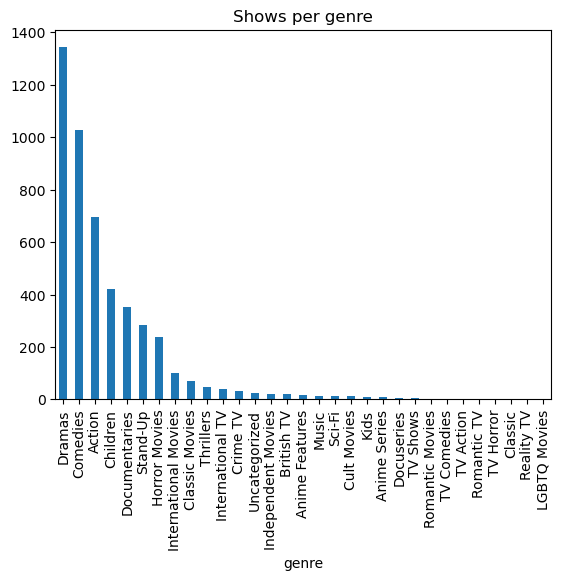

In [10]:
plt.clf()
genre_counts.plot(kind='bar',title='Shows per genre')#hist()
plt.show()

## Data Wrangling

First, lets remove the usless columns from the df

In [11]:
df_clean=df[['show_id','title','genre', 'type', 'duration' , 'release_year']]

Now lets filter the 'Movies'

In [12]:
df_clean=df_clean[df_clean['type']=='Movie']

Lets remove the *type* columns

In [13]:
df_clean=df_clean[['show_id','title','genre', 'duration' , 'release_year']]

Lets include only the movies releaded in 1990's

In [14]:
df_clean=df_clean[np.logical_and(df_clean['release_year']>=1990, df_clean['release_year']<2000)].reset_index().iloc[:,1:]
print('The ammount of Movies released from 1990 to 1999 is: ' + str(len(df_clean)))
df_clean.head()

The ammount of Movies released from 1990 to 1999 is: 183


,show_id,title,genre,duration,release_year
0,s8,187,Dramas,119,1997
1,s167,A Dangerous Woman,Dramas,101,1993
2,s211,A Night at the Roxbury,Comedies,82,1998
3,s239,A Thin Line Between Love & Hate,Comedies,108,1996
4,s274,Aashik Awara,Dramas,154,1993


## Analysis and solve problem

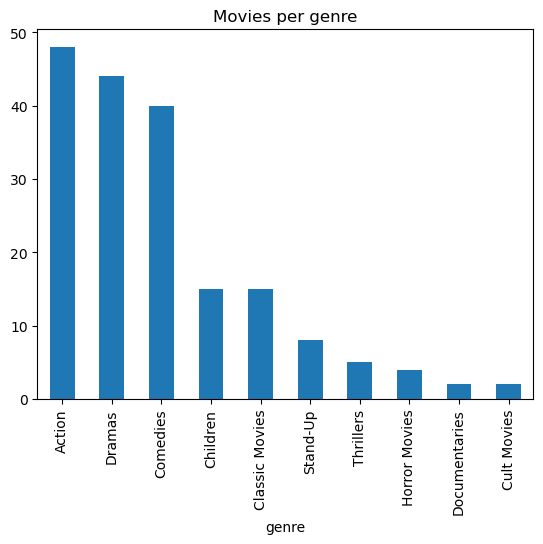

In [15]:
movie_counts = df_clean['genre'].value_counts()
plt.clf()
movie_counts.plot(kind='bar',title='Movies per genre')
plt.show()

The questions Datacam is asking are:
* What was the most frequent movie duration in the 1990s? Save an approximate answer as an integer called duration.
* A movie is considered short if it is less than 90 minutes. Count the number of short action movies released in the 1990s and save this integer as short_movie_count.

In [16]:
duration=int(df_clean['duration'].median())
duration

108

In [17]:
short_movie_count=len(df_clean[(df_clean['duration']<90)&(df_clean['genre']=='Action')])
short_movie_count

7